# **VISUALIZATIONS NOTEBOOK**

This notebook contains the code for the main visualizations of our project in Machine Learning for 3D geometry.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.colors import ListedColormap
import seaborn as sns
import pickle as pkl

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
path = "/content/drive/MyDrive/TUM/ML3D/Files for visualizations"

## Data distribution

The following code takes the statistics and distributions created from the whole training set, as well as our subsample of size 10,000 and compares them graphically. The function that obtains these files for a folder of `.npz`'s can be found at the end of this notebook, in the Auxiliary Functions section.

In [8]:
def read_pkl(filename):
    with open(filename, 'rb') as f:
        array = pkl.load(f)
    return array

In [9]:
num_planes = read_pkl(os.path.join(path, 'num_planes.pkl'))
num_classes = read_pkl(os.path.join(path, 'num_classes.pkl'))
planar = read_pkl(os.path.join(path, 'planar.pkl'))
class_distribution = read_pkl(os.path.join(path, 'class_distribution.pkl'))

In [10]:
num_planes_repo = read_pkl(os.path.join(path, 'num_planes_repo.pkl'))
num_classes_repo = read_pkl(os.path.join(path, 'num_classes_repo.pkl'))
planar_repo = read_pkl(os.path.join(path, 'planar_repo.pkl'))
class_distribution_repo = read_pkl(os.path.join(path, 'class_distribution_repo.pkl'))

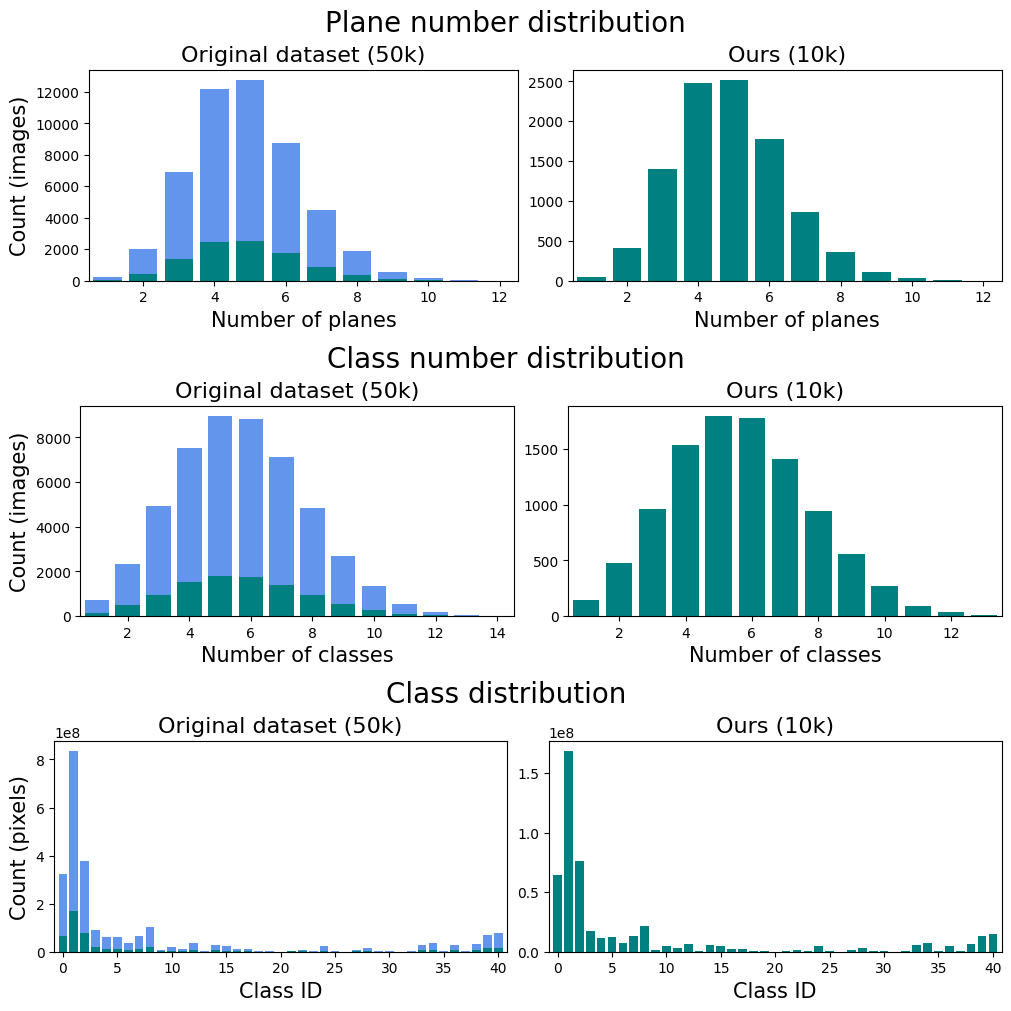

In [11]:
fig = plt.figure(constrained_layout=True, figsize=(10,10))

row_titles = ['Plane number distribution', 'Class number distribution', 'Class distribution']

figures = fig.subfigures(nrows=3, ncols=1)
for row, figure in enumerate(figures):
    figure.suptitle(row_titles[row], fontsize=20)
    axs = figure.subplots(1, 2)

    axs[0].set_title('Original dataset (50k)', fontsize=16)
    axs[1].set_title('Ours (10k)', fontsize=16)

    if row == 0:
        axs[0].bar(x=np.arange(1, len(np.unique(num_classes))), height=num_classes[1:len(np.unique(num_classes))], color='cornflowerblue')
        axs[0].bar(x=np.arange(1, len(np.unique(num_classes_repo))), height=num_classes_repo[1:len(np.unique(num_classes_repo))], color='teal')
        axs[1].bar(x=np.arange(1, len(np.unique(num_classes_repo))), height=num_classes_repo[1:len(np.unique(num_classes_repo))], color='teal')
        axs[0].set_xlabel('Number of planes', fontsize=15)
        axs[1].set_xlabel('Number of planes', fontsize=15)
        axs[0].set_ylabel('Count (images)', fontsize=15)
        axs[0].margins(x=0.01)
        axs[1].margins(x=0.01)

    if row == 1:
        axs[0].bar(x=np.arange(1, len(np.unique(num_planes))), height=num_planes[1:len(np.unique(num_planes))], color='cornflowerblue')
        axs[0].bar(x=np.arange(1, len(np.unique(num_planes_repo))), height=num_planes_repo[1:len(np.unique(num_planes_repo))], color='teal')
        axs[1].bar(x=np.arange(1, len(np.unique(num_planes_repo))), height=num_planes_repo[1:len(np.unique(num_planes_repo))], color='teal')
        axs[0].set_xlabel('Number of classes', fontsize=15)
        axs[1].set_xlabel('Number of classes', fontsize=15)
        axs[0].set_ylabel('Count (images)', fontsize=15)
        axs[0].margins(x=0.01)
        axs[1].margins(x=0.01)

    if row == 2:
        axs[0].bar(x=np.arange(len(class_distribution)), height=class_distribution,  color='cornflowerblue')
        axs[0].bar(x=np.arange(len(class_distribution_repo)), height=class_distribution_repo, color='teal')
        axs[1].bar(x=np.arange(len(class_distribution_repo)), height=class_distribution_repo, color='teal')
        axs[0].set_xlabel('Class ID', fontsize=15)
        axs[1].set_xlabel('Class ID', fontsize=15)
        axs[0].set_ylabel('Count (pixels)', fontsize=15)
        axs[0].margins(x=0.01)
        axs[1].margins(x=0.01)

# plt.savefig('data_distribution.pdf')

### Planar/Non-planar distribution

In [ ]:
print(planar, planar_repo)

## Contrastive loss

### Comparison of loss variants

The performance of our three variants of the supervised contrastive loss, altogether with the baseline embedding loss, is evaluated. In order to do this assessment, we plot their training curves from the history. Due to the fact that the number of anchors $m$ has a direct effect on the loss value and its scale, we also plot the normalized curves.

In [12]:
# Baseline: discriminative loss, LE = L_pull + L_push
c0 = np.load(os.path.join(path, "resnet101_baseline_epoch5.pkl"), allow_pickle=True)
c0 = [pull + push for pull, push in zip(c0['losses_pull'], c0['losses_push'])]

# Contrastive: LE is stored in both L_pull = L_push for code simplicity
c1 = np.load(os.path.join(path, "resnet101_contrastive_centers_epoch5.pkl"), allow_pickle=True)['losses_pull'] # contrastive
c2 = np.load(os.path.join(path, "resnet101_contrastive_anchors_m20_epoch5.pkl"), allow_pickle=True)['losses_pull'] # anchors
c3 = np.load(os.path.join(path, "resnet101_contrastive_anchors_neg_m20_epoch5.pkl"), allow_pickle=True)['losses_pull'] # anchors neg

Our first experiments only took the history every certain number of iterations, but the parameters are the same, and thus the results are comparable.

In [13]:
print(len(c0), len(c1), len(c2), len(c3))

3125 130 3125 130


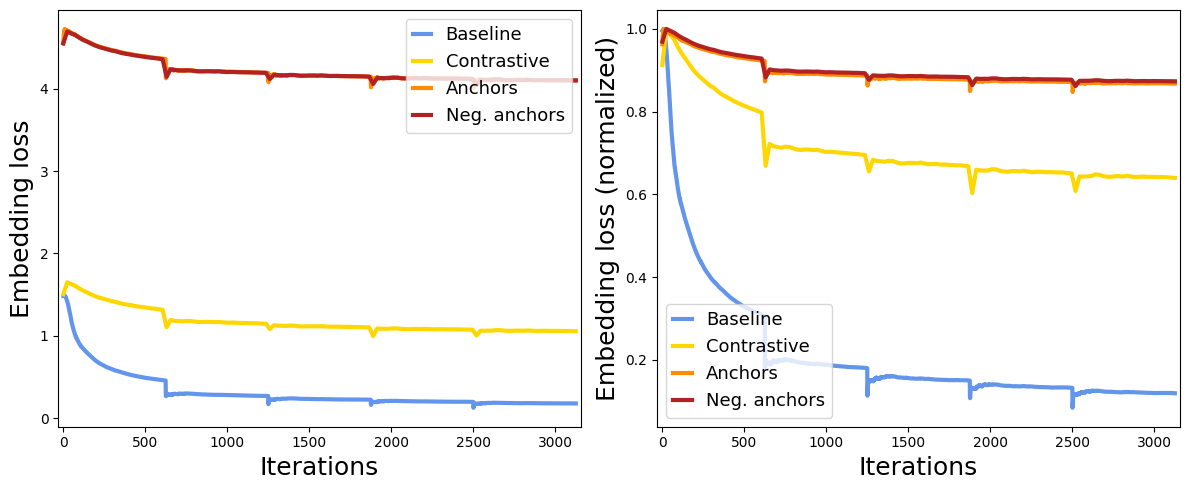

In [14]:
x_values_0 = np.linspace(1, 3126, len(c0))
x_values_1_3 = np.linspace(1, 3126, len(c1))
x_values_2 = np.linspace(1, 3126, len(c2))

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Curves
line1 = axs[0].plot(x_values_0, c0, label='Baseline', color='cornflowerblue', linewidth=3)
line2 = axs[0].plot(x_values_1_3, c1, label='Contrastive', color='gold', linewidth=3)
line3 = axs[0].plot(x_values_2, c2, label='Anchors', color='darkorange', linewidth=3)
line4 = axs[0].plot(x_values_1_3, c3, label='Neg. anchors', color='firebrick', linewidth=3)

axs[0].set_xlabel('Iterations', fontsize=18)
axs[0].set_ylabel('Embedding loss', fontsize=18)
axs[0].legend(handlelength=1, loc='upper right', fontsize=13)
axs[0].margins(x=0.01)


# Normalized curves
line1 = axs[1].plot(x_values_0, c0/np.max(c0), label='Baseline', color='cornflowerblue',  linewidth=3)
line2 = axs[1].plot(x_values_1_3, c1/np.max(c1), label='Contrastive', color='gold',  linewidth=3)
line3 = axs[1].plot(x_values_2, c2/np.max(c2), label='Anchors', color='darkorange', linewidth=3)
line4 = axs[1].plot(x_values_1_3, c3/np.max(c3), label='Neg. anchors', color='firebrick', linewidth=3)

axs[1].set_xlabel('Iterations', fontsize=18)
axs[1].set_ylabel('Embedding loss (normalized)', fontsize=18)
axs[1].legend(handlelength=1, loc='lower left', fontsize=13)
axs[1].margins(x=0.01)



plt.tight_layout()
# plt.savefig('curve_comparison.pdf')
plt.show()

### Embedding visualization

Taking advantage of the embedding dimension being 2, we plot them for each of the four trained models and 2 validation samples. In particular, we used `2.npz`, as it is the one used in the rest of evaluations, and took another sample arbitrarily.

#### Choice of `.npz` files and visualization

We choose `2.npz`, as it is the one used for the rest of results, and take two other arbitrary validation samples, `17.npz` and `41.npz`. After plotting them below, we choose `41.npz`.

In [15]:
def plot_npz(filename):
  sample = np.load(os.path.join(path, filename))
  images = ['image', 'depth', 'semantics', 'segmentation'] # normal is all 0

  fig, axes = plt.subplots(2, 2, figsize=(5, 5))

  axes = axes.flatten()

  for i, image in enumerate(images):
      axes[i].imshow(sample[image])
      axes[i].set_title(image)
      axes[i].axis('off')

  plt.tight_layout()
  plt.show()


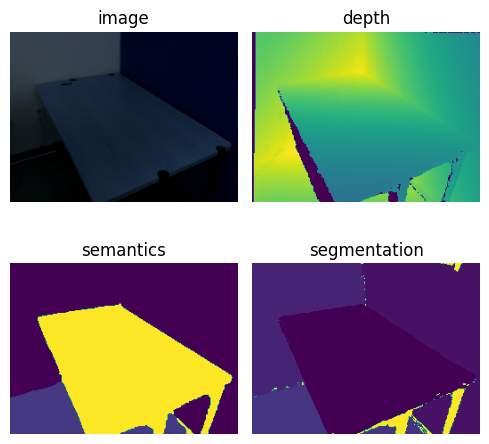

In [16]:
plot_npz('2.npz')

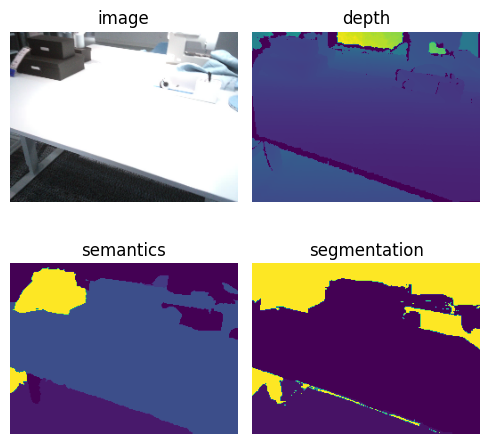

In [17]:
plot_npz('17.npz')

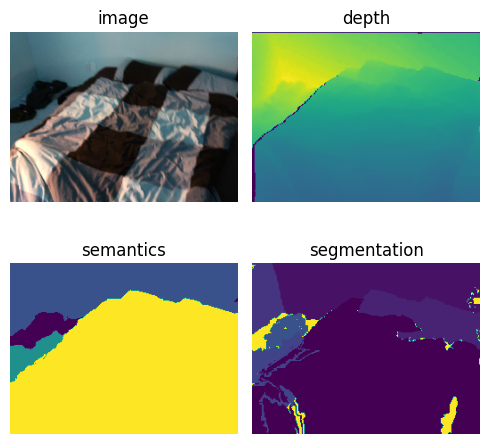

In [18]:
plot_npz('41.npz')

### Visualization

In [19]:
embedding_2_c0 = torch.load(os.path.join(path, 'embedding_0_hinge.pt')) # 1 x 2 x 192 x 256
embedding_41_c0 = torch.load(os.path.join(path, 'embedding_1_hinge.pt'))
instance_2_c0 = torch.load(os.path.join(path, 'instance_0_hinge.pt')) # 1 x 21 x 192 x 256
instance_41_c0 = torch.load(os.path.join(path, 'instance_1_hinge.pt'))

embedding_2_c1 = torch.load(os.path.join(path, 'embedding_0_contrastive.pt'))
embedding_41_c1 = torch.load(os.path.join(path, 'embedding_1_contrastive.pt'))
instance_2_c1 = torch.load(os.path.join(path, 'instance_0_contrastive.pt'))
instance_41_c1 = torch.load(os.path.join(path, 'instance_1_contrastive.pt'))

embedding_2_c2 = torch.load(os.path.join(path, 'embedding_0_contrastive_anchors.pt'))
embedding_41_c2 = torch.load(os.path.join(path, 'embedding_1_contrastive_anchors.pt'))
instance_2_c2 = torch.load(os.path.join(path, 'instance_0_contrastive_anchors.pt'))
instance_41_c2 = torch.load(os.path.join(path, 'instance_1_contrastive_anchors.pt'))

embedding_2_c3 = torch.load(os.path.join(path, 'embedding_0_contrastive_anchors_neg.pt'))
embedding_41_c3 = torch.load(os.path.join(path, 'embedding_1_contrastive_anchors_neg.pt'))
instance_2_c3 = torch.load(os.path.join(path, 'instance_0_contrastive_anchors_neg.pt'))
instance_41_c3 = torch.load(os.path.join(path, 'instance_1_contrastive_anchors_neg.pt'))

In [20]:
embedding = torch.cat((embedding_2_c0, embedding_41_c0, embedding_2_c1, embedding_41_c1, embedding_2_c2, embedding_41_c2, embedding_2_c3, embedding_41_c3))
instance = torch.cat((instance_2_c0, instance_41_c0, instance_2_c1, instance_41_c1, instance_2_c2, instance_41_c2, instance_2_c3, instance_41_c3))

print(embedding.shape, instance.shape)

torch.Size([8, 2, 192, 256]) torch.Size([8, 21, 192, 256])


In [21]:
labels = torch.zeros(instance.shape[0], instance.shape[2], instance.shape[3])
for i in range(instance.shape[1]):
    labels += instance[:, i, :, :]*i

In [22]:
spectral_colors_seaborn = sns.color_palette("Spectral", n_colors=12)
spectral_colors = spectral_colors_seaborn.as_hex()
spectral_colormap = ListedColormap(spectral_colors, name='spectral')

In [23]:
def plot_embedding(emb_path=None, inst_path=None, embedding=None, instance=None):


    fig = plt.figure(constrained_layout=True, figsize=(10,5))

    col_titles = ['Baseline Loss', 'Contrastive Loss', 'Contrastive anchor loss', 'Contrastive negative anchor loss']
    row_titles = ['Sample 2', 'Sample 41']

    if emb_path is not None:
        embedding = torch.load(emb_path)
    if inst_path is not None:
        instance = torch.load(inst_path)

    labels = torch.zeros(instance.shape[0], instance.shape[2], instance.shape[3])
    for i in range(instance.shape[1]):
        labels += instance[:, i, :, :]*i

    labels.view(labels.shape[0], -1)
    embedding.view(embedding.shape[0], embedding.shape[1], -1)

    imgs = embedding.detach().numpy()
    imgs = imgs[:, :, ::2, ::2]
    labels = labels.numpy()
    labels = labels[:,::2,::2]

    figures = fig.subfigures(nrows=1, ncols=4)

    for col, figure in enumerate(figures):
        figure.suptitle(col_titles[col], fontsize=12)
        axes = figure.subplots(2, 1)

        for row in range(2):
            axes[row].scatter(imgs[2*col + row][0], imgs[2*col + row][1], c=labels[2*col + row], s=3, cmap=spectral_colormap)
            axes[row].axis('off')
            axes[row].set_title(row_titles[row], fontsize=9)

    # plt.savefig('embedding_comparison.pdf')
    plt.show

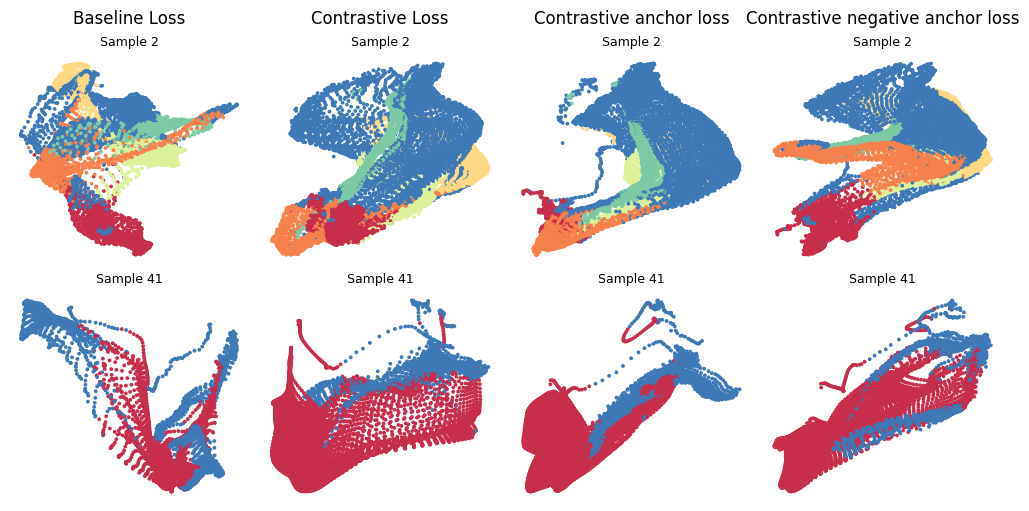

In [24]:
plot_embedding(embedding=embedding, instance=instance)

### Effect of different $m$ values

The parameter $m$ is the number of subsampled centers we create as anchors. We fine-tune it by plotting its influence in the training process, so that we can assess its importance and effect on the model. Once again, we plot the normalized curves due to the change in scale w.r.t. $m$.

In [25]:
m0 = np.load(os.path.join(path, "resnet101_contrastive_centers_epoch5.pkl"), allow_pickle=True)['losses_pull'] # m = 0 only centers
m1 = np.load(os.path.join(path, "resnet101_contrastive_anchors_m20_epoch5.pkl"), allow_pickle=True)['losses_pull'] # m = 20 default
m2 = np.load(os.path.join(path, "resnet101_contrastive_anchors_m50_epoch5.pkl"), allow_pickle=True)['losses_pull'] # m = 50
m3 = np.load(os.path.join(path, "resnet101_contrastive_anchors_m100_epoch5.pkl"), allow_pickle=True)['losses_pull'] # m = 100

As before, the first experiment saved less checkpoints but it is the same process, making it comparable.

In [26]:
print(len(m0), len(m1), len(m2), len(m3))

130 3125 3125 3125


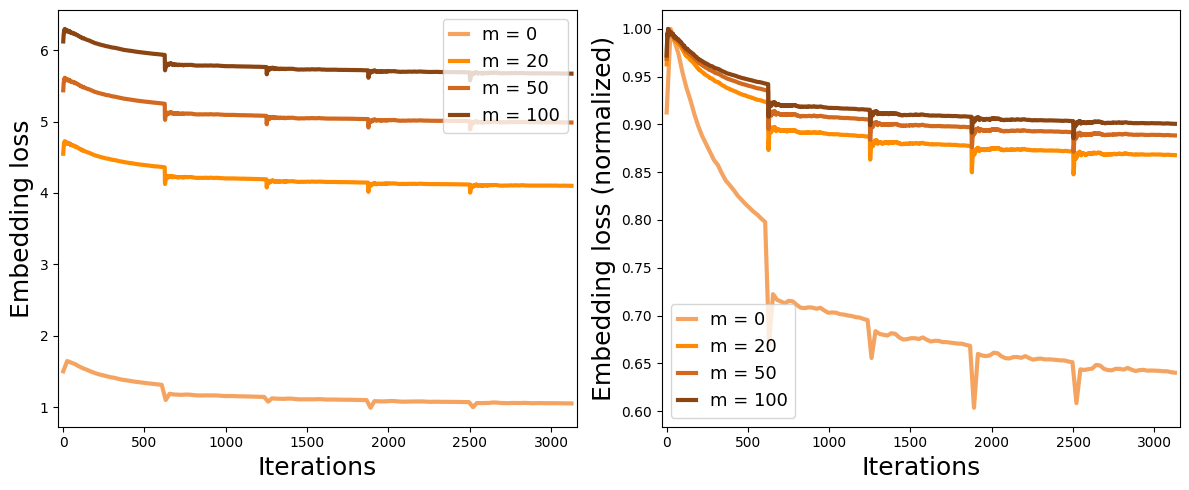

In [27]:
x_values_0 = np.linspace(1, 3126, len(m0))
x_values = np.linspace(1, 3126, len(m1))

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Curves
line1 = axs[0].plot(x_values_0, m0, label='m = 0', color='sandybrown', linewidth=3)
line2 = axs[0].plot(x_values, m1, label='m = 20', color='darkorange', linewidth=3)
line3 = axs[0].plot(x_values, m2, label='m = 50', color='chocolate', linewidth=3)
line4 = axs[0].plot(x_values, m3, label='m = 100', color='saddlebrown', linewidth=3)

axs[0].set_xlabel('Iterations', fontsize=18)
axs[0].set_ylabel('Embedding loss', fontsize=18)
axs[0].legend(handlelength=1, loc='upper right', fontsize=13)
axs[0].margins(x=0.01)

# Normalized curves
line1 = axs[1].plot(x_values_0, m0/np.max(m0), label='m = 0', color='sandybrown', linewidth=3)
line2 = axs[1].plot(x_values, m1/np.max(m1), label='m = 20', color='darkorange', linewidth=3)
line3 = axs[1].plot(x_values, m2/np.max(m2), label='m = 50', color='chocolate', linewidth=3)
line4 = axs[1].plot(x_values, m3/np.max(m3), label='m = 100', color='saddlebrown', linewidth=3)

axs[1].set_xlabel('Iterations', fontsize=18)
axs[1].set_ylabel('Embedding loss (normalized)', fontsize=18)
axs[1].legend(handlelength=1, loc='lower left', fontsize=13)
axs[1].margins(x=0.01)



plt.tight_layout()
# plt.savefig('m_learning_curves.pdf')
plt.show()

### Final evaluation

As a final measure of performance, we use the same that the original paper: pixel and plane recall curves. We compare each loss, including the baseline, in the validation process.

In [28]:
pixel_baseline = [0., 0.10088247, 0.24343157, 0.34720626, 0.43198079, 0.49460507,
 0.5320374,  0.56826576, 0.58781993, 0.60261733, 0.61647179, 0.62501744,
 0.62934931]
plane_baseline = [0., 0.07828559, 0.18368686, 0.26547124, 0.3284496,  0.37196589,
 0.40258036, 0.42947737, 0.44500328, 0.45877979, 0.46840149, 0.47692981,
 0.4804286 ]

contrastive_pixel = [0., 0.03560632, 0.09829715, 0.14656778, 0.17928404, 0.20553973,
 0.22244381, 0.23866865, 0.25129303, 0.25712954, 0.26937881, 0.275066, 0.27824182]
contrastive_plane = [0., 0.02274218, 0.05947955, 0.08834463, 0.10846272, 0.12289525,
 0.13339165, 0.14257599, 0.14913623, 0.15350973, 0.16028865, 0.1633501, 0.16488082]

anchors_pixel = [0., 0.04228757, 0.09508605, 0.14488468, 0.1730862,  0.19513789,
 0.21685488, 0.2287887,  0.23794144, 0.2463554,  0.2535876,  0.25965537, 0.26375664]
anchors_plane = [0., 0.02580363, 0.05794883, 0.08681391, 0.10408922, 0.11939646,
 0.13186092, 0.13929587, 0.14498141, 0.15044828, 0.15394708, 0.15700853, 0.1589766]


anchors_neg_pixel = [0., 0.03871426, 0.09800477, 0.13837242, 0.16670952, 0.18890011,
 0.20670887, 0.22311466, 0.23405961, 0.24028966, 0.24802415, 0.25189113, 0.25265878]
anchors_neg_plane = [0., 0.0286464,  0.06385305, 0.08746993, 0.10518259, 0.11720971,
0.12879948, 0.13820249, 0.14476274, 0.14891756, 0.15307238, 0.15504045, 0.15591515]

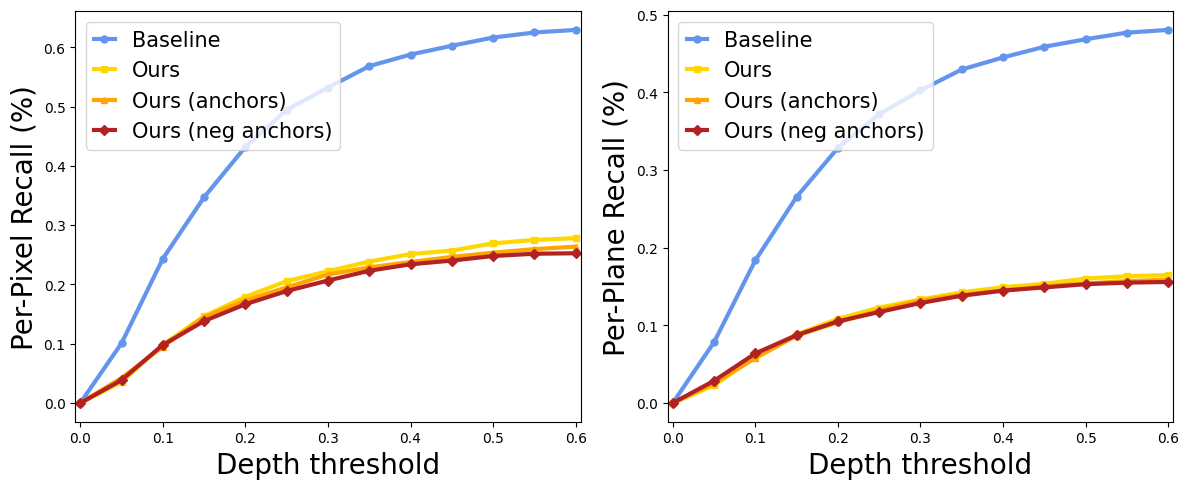

In [29]:
x_values = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]


fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Pixel recall
line1, = axs[0].plot(x_values, pixel_baseline, label='Baseline', color='cornflowerblue', marker='o', markersize=5, linewidth=3)
line2, = axs[0].plot(x_values, contrastive_pixel, label='Ours', color='gold', marker='s', markersize=5, linewidth=3)
line3, = axs[0].plot(x_values, anchors_pixel, label='Ours (anchors)', color='orange', marker='^', markersize=5, linewidth=3)
line4, = axs[0].plot(x_values, anchors_neg_pixel, label='Ours (neg anchors)', color='firebrick', marker='D', markersize=5, linewidth=3)

axs[0].set_xlabel('Depth threshold', fontsize=20)
axs[0].set_ylabel('Per-Pixel Recall (%)', fontsize=20)
axs[0].legend(handlelength=1, loc='upper left', fontsize=15)
axs[0].margins(x=0.01)


# Plane recall
line5, = axs[1].plot(x_values, plane_baseline, label='Baseline', color='cornflowerblue', marker='o', markersize=5, linewidth=3)
line6, = axs[1].plot(x_values, contrastive_plane, label='Ours', color='gold', marker='s', markersize=5, linewidth=3)
line7, = axs[1].plot(x_values, anchors_plane, label='Ours (anchors)', color='orange', marker='^', markersize=5, linewidth=3)
line8, = axs[1].plot(x_values, anchors_neg_plane, label='Ours (neg anchors)', color='firebrick', marker='D', markersize=5, linewidth=3)

axs[1].set_xlabel('Depth threshold', fontsize=20)
axs[1].set_ylabel('Per-Plane Recall (%)', fontsize=20)
axs[1].legend(handlelength=1, loc='upper left', fontsize=15)
axs[1].margins(x=0.01)


plt.tight_layout()
# plt.savefig('contrastive_recall.pdf')
plt.show()

## Semantic branch


For the semantic branch, besides the qualitative plots which are generated from the evaluation and edited from the `.png`, we provide the training curves and pixel and plane recall for both methods: adding an extra layer and without it.

In [34]:
s1 = np.load(os.path.join(path, "semantic.pkl"), allow_pickle=True)['losses_semantic']
s2 = np.load(os.path.join(path, "semantic_extra.pkl"), allow_pickle=True)['losses_semantic']

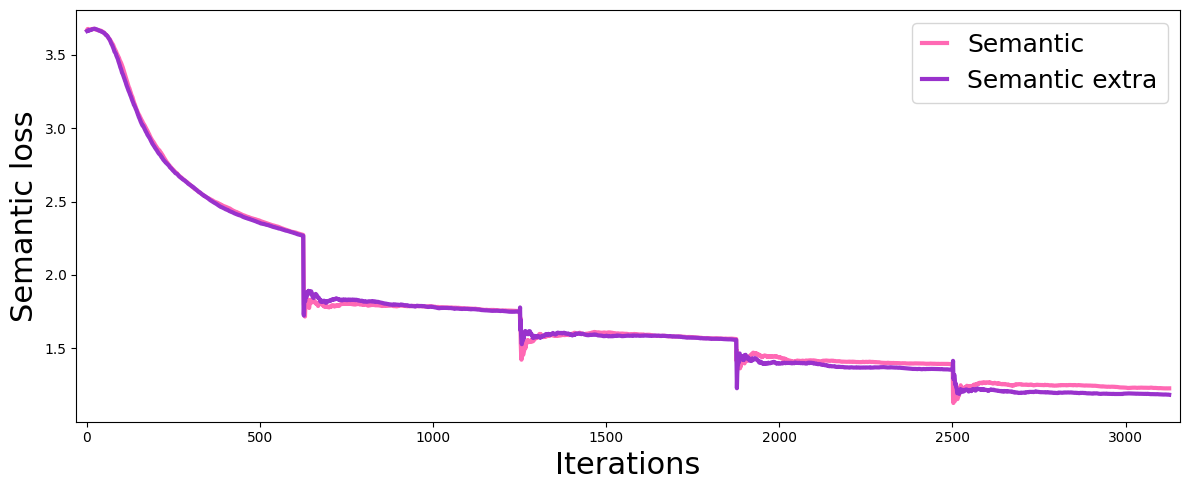

In [35]:
x_values = np.linspace(1, 3126, len(s1))

fig, axs = plt.subplots(1, 1, figsize=(12, 5))

line1 = axs.plot(x_values, s1, label='Semantic', color='hotpink', linewidth=3)
line2 = axs.plot(x_values, s2, label='Semantic extra', color='darkorchid', linewidth=3)

axs.set_xlabel('Iterations', fontsize=22)
axs.set_ylabel('Semantic loss', fontsize=22)
axs.legend(handlelength=1, loc='upper right', fontsize=18)
axs.margins(x=0.01)

plt.tight_layout()
# plt.savefig('semantic_curve.pdf')
plt.show()

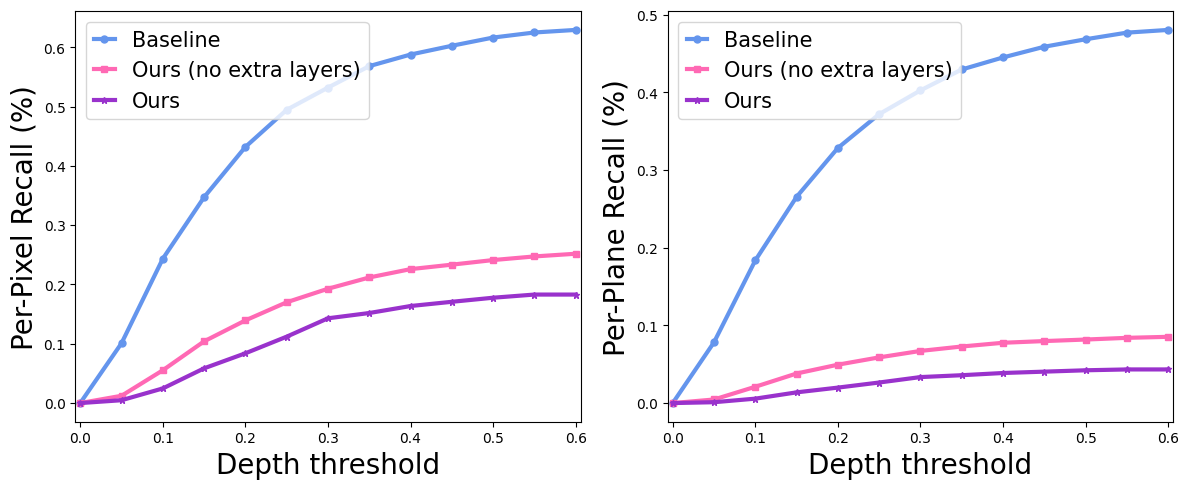

In [36]:
pixel_baseline = [0., 0.10088247, 0.24343157, 0.34720626, 0.43198079, 0.49460507,
 0.5320374,  0.56826576, 0.58781993, 0.60261733, 0.61647179, 0.62501744,
 0.62934931]
plane_baseline = [0.,         0.07828559, 0.18368686, 0.26547124, 0.3284496,  0.37196589,
 0.40258036, 0.42947737, 0.44500328, 0.45877979, 0.46840149, 0.47692981,
 0.4804286 ]

pixel_extras = [0., 0.00478449, 0.02468754, 0.05858352, 0.08394108, 0.1119855,
 0.14297042, 0.15186629, 0.16367666, 0.17079762, 0.17766801, 0.18299555, 0.18299555]
plane_extras = [0., 0.00109337, 0.00568555, 0.01377651, 0.01989941, 0.02645965,
 0.03345725, 0.03586267, 0.03870545, 0.04045484, 0.04220424, 0.04329762, 0.04329762]

pixel_no_extras = [0.,  0.01228689, 0.05531667, 0.10409743, 0.13941953, 0.17000838,
 0.19281804, 0.21182488, 0.22589422, 0.23343345, 0.24119156, 0.24730025, 0.25184117]
plane_no_extras = [0., 0.00459217, 0.02099278, 0.03804942, 0.04942051, 0.05882353,
 0.06713317, 0.07281872, 0.07762956, 0.07981631, 0.08178439, 0.08397113, 0.08528318]


x_values = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Pixel recall
line1, = axs[0].plot(x_values, pixel_baseline, label='Baseline', color='cornflowerblue', marker='o', markersize=5, linewidth=3)
line2, = axs[0].plot(x_values, pixel_no_extras, label='Ours (no extra layers)', color='hotpink', marker='s', markersize=5, linewidth=3)
line3, = axs[0].plot(x_values, pixel_extras, label='Ours', color='darkorchid', marker='*', markersize=5, linewidth=3)
axs[0].set_xlabel('Depth threshold', fontsize=20)
axs[0].set_ylabel('Per-Pixel Recall (%)', fontsize=20)
axs[0].legend(handlelength=1, loc='upper left', fontsize=15)
axs[0].margins(x=0.01)

# Plane recall
line4, = axs[1].plot(x_values, plane_baseline, label='Baseline', color='cornflowerblue', marker='o', markersize=5, linewidth=3)
line5, = axs[1].plot(x_values, plane_no_extras, label='Ours (no extra layers)', color='hotpink', marker='s', markersize=5, linewidth=3)
line6, = axs[1].plot(x_values, plane_extras, label='Ours', color='darkorchid', marker='*', markersize=5, linewidth=3)
axs[1].set_xlabel('Depth threshold', fontsize=20)
axs[1].set_ylabel('Per-Plane Recall (%)', fontsize=20)
axs[1].legend(handlelength=1, loc='upper left', fontsize=15)
axs[1].margins(x=0.01)


plt.tight_layout()
# plt.savefig('semantic_recall.pdf')
plt.show()

## FINAL EVALUATION


Our final and main result is the plot showing all the recall curves, one for each modification (the best variant of each is chosen).

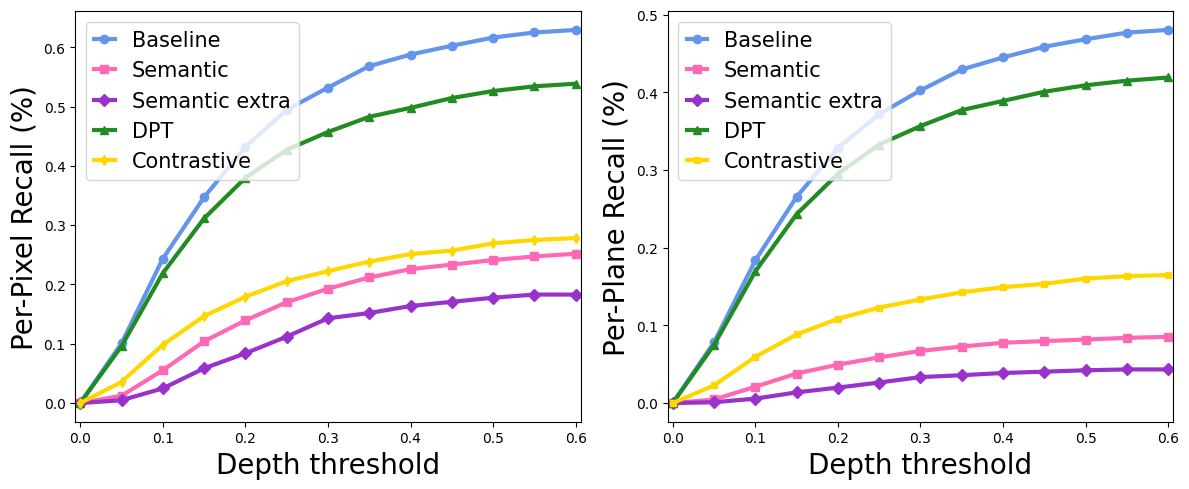

In [37]:
pixel_baseline = [0., 0.10088247, 0.24343157, 0.34720626, 0.43198079, 0.49460507,
 0.5320374,  0.56826576, 0.58781993, 0.60261733, 0.61647179, 0.62501744,
 0.62934931]
plane_baseline = [0.,         0.07828559, 0.18368686, 0.26547124, 0.3284496,  0.37196589,
 0.40258036, 0.42947737, 0.44500328, 0.45877979, 0.46840149, 0.47692981,
 0.4804286 ]

pixel_extras = [0., 0.00478449, 0.02468754, 0.05858352, 0.08394108, 0.1119855,
 0.14297042, 0.15186629, 0.16367666, 0.17079762, 0.17766801, 0.18299555, 0.18299555]
plane_extras = [0., 0.00109337, 0.00568555, 0.01377651, 0.01989941, 0.02645965,
 0.03345725, 0.03586267, 0.03870545, 0.04045484, 0.04220424, 0.04329762, 0.04329762]

pixel_no_extras = [0.,  0.01228689, 0.05531667, 0.10409743, 0.13941953, 0.17000838,
 0.19281804, 0.21182488, 0.22589422, 0.23343345, 0.24119156, 0.24730025, 0.25184117]
plane_no_extras = [0., 0.00459217, 0.02099278, 0.03804942, 0.04942051, 0.05882353,
 0.06713317, 0.07281872, 0.07762956, 0.07981631, 0.08178439, 0.08397113, 0.08528318]

pixel_dpt = [0., 0.09594726, 0.2190536, 0.31144453, 0.3799136, 0.42714037,
 0.4571416, 0.48280534, 0.49791348, 0.5144583 ,0.52628998, 0.5342085,
 0.53862206]
plane_dpt = [0., 0.07478679, 0.16947299, 0.24316641, 0.29499235, 0.33282309,
 0.35665865, 0.37721408, 0.38902252, 0.40083096, 0.40914061, 0.41504483,
 0.41919965]

contrastive_pixel = [0., 0.03560632, 0.09829715, 0.14656778, 0.17928404, 0.20553973,
 0.22244381, 0.23866865, 0.25129303, 0.25712954, 0.26937881, 0.275066, 0.27824182]
contrastive_plane = [0., 0.02274218, 0.05947955, 0.08834463, 0.10846272, 0.12289525,
 0.13339165, 0.14257599, 0.14913623, 0.15350973, 0.16028865, 0.1633501, 0.16488082]



x_values = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
fig, axs = plt.subplots(1, 2, figsize=(12, 5))


# Pixel recall
line1, = axs[0].plot(x_values, pixel_baseline, label='Baseline', color='cornflowerblue', marker='o', markersize=6, linewidth=3)
line2, = axs[0].plot(x_values, pixel_no_extras, label='Semantic', color='hotpink', marker='s', markersize=6, linewidth=3)
line3, = axs[0].plot(x_values, pixel_extras, label='Semantic extra', color='darkorchid', marker='D', markersize=6, linewidth=3)
line4, = axs[0].plot(x_values, pixel_dpt, label='DPT', color='forestgreen', marker='^', markersize=6, linewidth=3)
line5, = axs[0].plot(x_values, contrastive_pixel, label='Contrastive', color='gold', marker='d', markersize=5, linewidth=3)

axs[0].set_xlabel('Depth threshold', fontsize=20)
axs[0].set_ylabel('Per-Pixel Recall (%)', fontsize=20)
axs[0].legend(handlelength=1, loc='upper left', fontsize=15)
axs[0].margins(x=0.01)


# Plane recall
line6, = axs[1].plot(x_values, plane_baseline, label='Baseline', color='cornflowerblue', marker='o', markersize=6, linewidth=3)
line7, = axs[1].plot(x_values, plane_no_extras, label='Semantic', color='hotpink', marker='s', markersize=6, linewidth=3)
line8, = axs[1].plot(x_values, plane_extras, label='Semantic extra', color='darkorchid', marker='D', markersize=6, linewidth=3)
line9, = axs[1].plot(x_values, plane_dpt, label='DPT', color='forestgreen', marker='^', markersize=6, linewidth=3)
line10, = axs[1].plot(x_values, contrastive_plane, label='Contrastive', color='gold', marker='s', markersize=5, linewidth=3)

axs[1].set_xlabel('Depth threshold', fontsize=20)
axs[1].set_ylabel('Per-Plane Recall (%)', fontsize=20)
axs[1].legend(handlelength=1, loc='upper left', fontsize=15)
axs[1].margins(x=0.01)


plt.tight_layout()
# plt.savefig('total_recall.pdf')
plt.show()

## Auxiliary functions

These are some auxiliary functions we used or developed during the visualization process, as well as for dealing with the data.

This code is used to evaluate the statistics and general characteristics of a folder containing several .npz files as used in the project, pickling some distribution arrays.

In [ ]:
from pathlib import Path

def distributions(path):
    folder_path = Path(path) # folder containing npz files

    num_planes = np.zeros(20, dtype=int) # max num_planes is 20
    num_classes = np.zeros(41, dtype=int) # there are 40 categories + unknown
    class_distribution = np.zeros(41, dtype=int)
    planar = 0

    i = 1
    for file_path in folder_path.glob('*.npz'):
        sample = np.load(file_path)
        num_planes[sample['num_planes']] += 1

        classes, counts = np.unique(sample['semantics'], return_counts=True)
        num_classes[len(classes)] += 1
        class_distribution[classes] += counts

        planar += np.sum(sample['segmentation'] != 20) / (192*256)

        if i%1000 == 0:
            print(i)
        i += 1

    planar /= i


    with open('num_planes.pkl', 'wb') as f:
        pkl.dump(num_planes, f)

    with open('num_classes.pkl', 'wb') as f:
        pkl.dump(num_classes, f)

    with open('class_distribution.pkl', 'wb') as f:
        pkl.dump(class_distribution, f)

    with open('planar.pkl', 'wb') as f:
        pkl.dump(planar, f)

This file contains several miscelaneous functions used to make partitions and in general deal with the .npz folders for visualization, distribution evaluation and subsampling.

In [ ]:
import random
import shutil

def create_txt(path, partition, sample):
    "Given a list of indices, creates a mini_partition.txt in path where each line is index.npz"
    with open(f"{path}\mini_{partition}.txt", 'w') as file:
        for n in sample:
            file.write(f"{n}.npz\n")


def create_dir(path, partition, sample):
    """
    Given a list of indices, copies the corresponding index.npz files from the partition directory in
    path into a mini_partition directory. If mini_partition exists, it is deleted.
    """
    source_dir = f"{path}\{partition}"
    out_dir = f"{path}\mini_{partition}"

    if os.path.exists(out_dir):
        shutil.rmtree(out_dir)
    os.makedirs(out_dir)

    for file in sample:
        source_path = os.path.join(source_dir, str(file) + '.npz')
        destination_path = os.path.join(out_dir, str(file) + '.npz')
        shutil.copy(source_path, destination_path)


def partition_from_txt(file_path):
    """
    Given a path to a .txt file as the ones used in the project, it provides the
    sample list of names in it, in order to create a partition afterward.
    """
    sample = []

    with open(file_path, 'r') as file:
        for line in file:
            num = int(line.split('.')[0])
            sample.append(int(num))

    return sample


def sub_txt(in_path, out_path, size):
    """
    Given source and destination paths, it takes a .txt file as the ones used
    in the project made of .npz's and creates a subsample of the specified size.
    """
    with open(in_path, 'r') as f:
        lines = f.readlines()

    subsample = random.sample(lines, size)

    with open(os.path.join(out_path, 'subsample2.txt'), 'w') as f:
        f.writelines(subsample)

This is the original function to plot the embeddings of a whole batch, accepting both the paths or the files as an input.

In [ ]:
def plot_embedding(emb_path=None, inst_path=None, embedding=None, instance=None):


    fig = plt.figure(constrained_layout=True, figsize=(10,10))

    row_titles = ['Baseline Loss', 'Contrastive Loss', 'Contrastive anchor loss', 'Contrastive negative anchor loss']
    col_titles = ['Sample 1', 'Sample 2', 'Sample 3', 'Sample 4']

    if emb_path is not None:
        embedding = torch.load(emb_path)
    if inst_path is not None:
        instance = torch.load(inst_path)

    labels = torch.zeros(instance.shape[0], instance.shape[2], instance.shape[3])
    for i in range(instance.shape[1]):
        labels += instance[:, i, :, :]*i

    labels.view(labels.shape[0], -1)
    embedding.view(embedding.shape[0], embedding.shape[1], -1)

    batch_img = embedding.detach().numpy()
    batch_img = batch_img[:, :, ::3, ::3]
    batch_labels = labels.numpy()
    batch_labels = batch_labels[:,::3,::3]

    figures = fig.subfigures(nrows=4, ncols=1)
    for row, figure in enumerate(figures):
        figure.suptitle(row_titles[row])

        axes = figure.subplots(1, 4) # assuming batch_size=16

        for col in range(4):
            axes[col].scatter(batch_img[4*row + col][0], batch_img[4*row + col][1], c=batch_labels[4*row + col], s=3, cmap=spectral_colormap)
            axes[col].axis('off')
            axes[col].title.set_text(col_titles[col])

    plt.savefig('embedding_comparison.png')
    plt.show

With the code below we plot the semantic ground truth with the corresponding labels.

In [ ]:
id_dict = {
 0: 'unknown',
 1: 'wall',
 2: 'floor',
 3: 'cabinet',
 4: 'bed',
 5: 'chair',
 6: 'sofa',
 7: 'table',
 8: 'door',
 9: 'window',
 10: 'bookshelf',
 11: 'picture',
 12: 'counter',
 13: 'blinds',
 14: 'desk',
 15: 'shelves',
 16: 'curtain',
 17: 'dresser',
 18: 'pillow',
 19: 'mirror',
 20: 'floor mat',
 21: 'clothes',
 22: 'ceiling',
 23: 'books',
 24: 'refridgerator',
 25: 'television',
 26: 'paper',
 27: 'towel',
 28: 'shower curtain',
 29: 'box',
 30: 'whiteboard',
 31: 'person',
 32: 'night stand',
 33: 'toilet',
 34: 'sink',
 35: 'lamp',
 36: 'bathtub',
 37: 'bag',
 38: 'otherstructure',
 39: 'otherfurniture',
 40: 'otherprop'}

In [ ]:
def plot_semantic(filename, colormap='Dark2'):
    sample = np.load(os.path.join(path, filename))
    semantics = sample['semantics']
    cmap = plt.colormaps[colormap]
    labels = np.vectorize(id_dict.get)(np.unique(semantics))
    colors = [cmap(i)[0:3] for i in range(len(np.unique(semantics)))]
    mapping = dict(zip(labels, colors))

    plt.imshow(np.transpose(np.vectorize(mapping.get)(np.vectorize(id_dict.get)(semantics)), (1,2,0)))
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in mapping.values()]
    plt.legend(markers, mapping.keys(), numpoints=1)
    plt.tight_layout()

In [ ]:
plot_semantic('2.npz')